## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
from scipy.io import loadmat
mnist = loadmat("mnist-original.mat")
x = mnist['data']
y = mnist["label"][0]

In [3]:
import numpy as np
x = np.transpose(x)
x.shape    

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
%matplotlib inline

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
some_digit = x[15000]
some_digit_image = some_digit.reshape(28,28) # Let's resahpe it to plot it

(-0.5, 27.5, 27.5, -0.5)

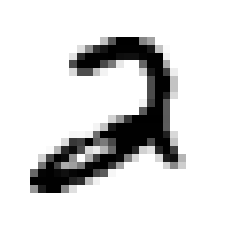

In [8]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")

In [9]:
y[ 15000]

2.0

## Train and Test set Splitting

In [10]:
x_train, x_test = x[:60000], x[60000:]

In [11]:
y_train, y_test = y[:60000], y[60000:]

In [12]:
# Random shuffling of data to get varied datapoints
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 Detector

In [13]:
y_train = y_train.astype(np.int8) # Convert all string to integer
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [14]:
y_train

array([1, 3, 5, ..., 0, 7, 5], dtype=int8)

In [15]:
from sklearn.linear_model import LogisticRegression

In [20]:
clf = LogisticRegression(tol = 0.1, solver='liblinear')

In [21]:
clf.fit(x_train, y_train_2)

LogisticRegression(solver='liblinear', tol=0.1)

In [22]:
clf.predict([some_digit])

array([ True])

## Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv =3, scoring = "accuracy")

In [25]:
a.mean()

0.9777999999999999

## Create a Classifier which will classify a digit as 'not 2'

In [26]:
y_train0 = y_train.astype(np.int8) # Convert all string to integer
y_test0 = y_test.astype(np.int8)
y_train_0 = (y_train!=2)
y_test_0 = (y_test!=2)

In [27]:
y_train_0

array([ True,  True,  True, ...,  True,  True,  True])

In [28]:
clf0 = LogisticRegression(tol = 0.1, solver='liblinear')

In [29]:
clf0.fit(x_train, y_train_0)

LogisticRegression(solver='liblinear', tol=0.1)

In [100]:
import random
index = random.randint(0,70000)
b = x[index]
if clf0.predict([b]) == 1:
 print(" Not 2")
else :
 print("2")

2


(-0.5, 27.5, 27.5, -0.5)

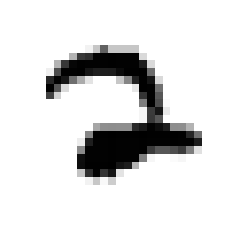

In [102]:
b = b.reshape(28,28)
plt.imshow(b, cmap=matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off") 

In [104]:
from sklearn.model_selection import cross_val_score
c = cross_val_score(clf0, x_train, y_train_0, cv =3, scoring = "accuracy")

In [105]:
c.mean()

0.9777999999999999